In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/second_2179.csv')
df

,index,_id,device_id,days,sex,temperature,humidity,voc
0,2023-05-08 07:55:21,355907309.0,2179.0,826.0,1.0,2940.0,3072.0,0.0
1,2023-05-08 07:55:22,355907310.0,2179.0,826.0,1.0,2940.0,3072.0,0.0
2,2023-05-08 07:55:23,355907311.0,2179.0,826.0,1.0,2940.0,3071.0,0.0
3,2023-05-08 07:55:24,355907312.0,2179.0,826.0,1.0,2940.0,3071.0,0.0
4,2023-05-08 07:55:25,355907313.0,2179.0,826.0,1.0,2939.0,3072.0,0.0
...,...,...,...,...,...,...,...,...
15144142,2023-10-30 14:37:43,403466583.0,2179.0,1001.0,1.0,2941.0,4357.0,6492.0
15144143,2023-10-30 14:37:44,403466584.0,2179.0,1001.0,1.0,2940.0,4357.0,6390.0
15144144,2023-10-30 14:37:45,403466585.0,2179.0,1001.0,1.0,2940.0,4360.0,6383.0
15144145,2023-10-30 14:37:46,403466586.0,2179.0,1001.0,1.0,2940.0,4358.0,6429.0


In [14]:
df['index'] = pd.to_datetime(df['index'])

In [21]:
three_df = df[(df['index'].dt.month == 5) & (df['index'].dt.day.isin([9,10,11]))] 

In [22]:
three_df.isna().sum()

index              0
_id            51296
device_id          0
days               0
sex                0
temperature    51296
humidity       51296
voc            51296
dtype: int64

In [33]:
three_df['temperature'] = three_df['temperature'].apply(lambda x:x*0.01)
three_df['humidity'] = three_df['humidity'].apply(lambda x:x*0.01)
three_df['voc'] = three_df['voc'].apply(lambda x:x*0.001)

C:\Users\yeong\AppData\Local\Temp\ipykernel_4316\1158716780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_df['temperature'] = three_df['temperature'].apply(lambda x:x*0.01)
C:\Users\yeong\AppData\Local\Temp\ipykernel_4316\1158716780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_df['humidity'] = three_df['humidity'].apply(lambda x:x*0.01)
C:\Users\yeong\AppData\Local\Temp\ipykernel_4316\1158716780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [36]:
three_df[['index', 'temperature','humidity','voc']].to_csv('data.csv', index=False)

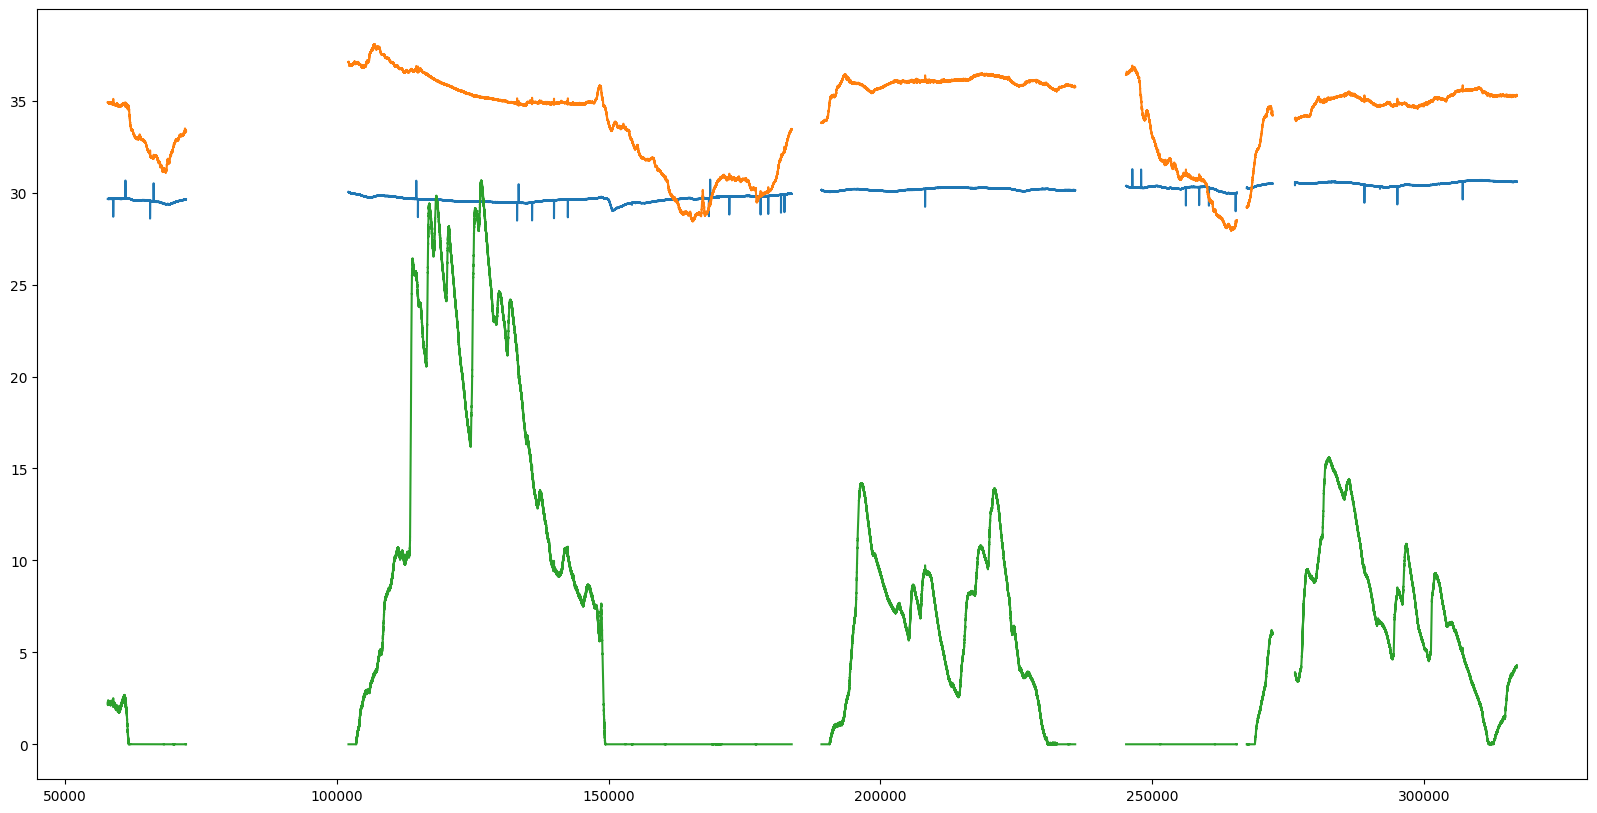

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(three_df['temperature'] * 0.01)
plt.plot(three_df['humidity'] * 0.01)
plt.plot(three_df['voc'] * 0.001)
plt.show()